In [22]:
import pandas as pd

dados = pd.read_csv("dados.csv")

dados

,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,5,5,3,4,5,4,4,5,5
1,5,5,5,5,5,5,5,5,5
2,4,3,2,4,5,4,5,4,4
3,3,2,4,2,3,3,2,3,3
4,5,4,4,4,4,3,4,5,4
5,5,5,5,4,5,5,5,5,4
6,5,5,3,3,3,4,4,4,4
7,5,5,3,3,4,4,4,4,3
8,5,4,5,4,5,5,5,5,2
9,5,5,5,5,5,5,3,5,5


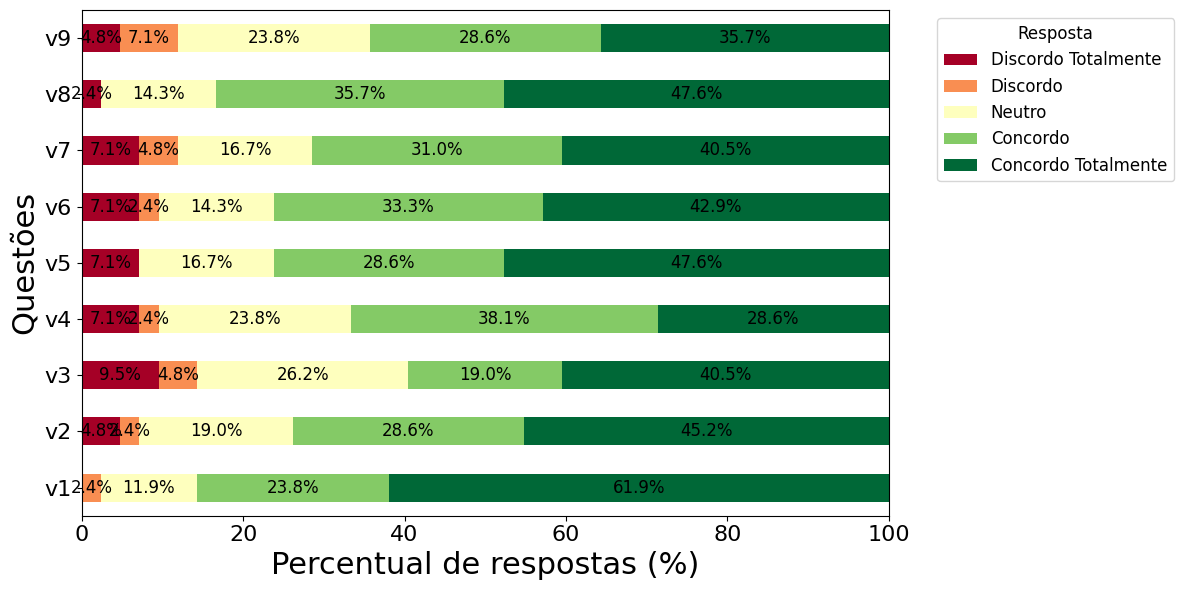

In [32]:
import matplotlib.pyplot as plt

# Garantir ordem e rótulos da escala Likert
likert_order = [1, 2, 3, 4, 5]
likert_labels = {
    1: 'Discordo Totalmente',
    2: 'Discordo',
    3: 'Neutro',
    4: 'Concordo',
    5: 'Concordo Totalmente'
}

# Calcular a frequência de cada valor para cada questão (preencher com 0 quando ausente)
likert_counts = dados.apply(pd.Series.value_counts).reindex(likert_order).fillna(0)

# Calcular percentuais por questão (cada coluna é uma questão)
likert_perc = likert_counts.div(likert_counts.sum(axis=0), axis=1) * 100

# Plotar gráfico de barras empilhadas (Likert) em percentuais com rótulos amigáveis na legenda
ax = likert_perc.T.rename(columns=likert_labels).plot(kind='barh', stacked=True, figsize=(12,6), colormap='RdYlGn')

# Anotar percentuais dentro dos segmentos (apenas quando visíveis)
for p in ax.patches:
    width = p.get_width()
    if width >= 2:  # ajustar limite mínimo para exibir rótulo
        x = p.get_x() + width / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{width:.1f}%", ha='center', va='center', fontsize=12, color='black')

plt.ylabel('Questões', fontsize=22)
plt.xlabel('Percentual de respostas (%)', fontsize=22)
plt.xticks(fontsize=16)                          # tamanho dos números/ticks do eixo x
plt.yticks(fontsize=16)
# plt.title('Distribuição das respostas (Escala Likert)', fontsize=20)
plt.legend(title='Resposta', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()